In [1]:
import pandas as pd

# Use the correct path to your Titanic CSV file
file_path = r"C:\Users\lucir\Downloads\titanic.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Sex'].value_counts()
df['Embarked'].value_counts()
df['Pclass'].value_counts()


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [6]:
# Fill missing Age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) 



C:\Users\lucir\AppData\Local\Temp\ipykernel_29128\3065915042.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\lucir\AppData\Local\Temp\ipykernel_29128\3065915042.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [7]:
# Fill missing Age values with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with the most frequent value (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode Sex column (Male: 0, Female: 1)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# Encode Embarked column
df['Embarked'] = le.fit_transform(df['Embarked'])


In [9]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)


In [10]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


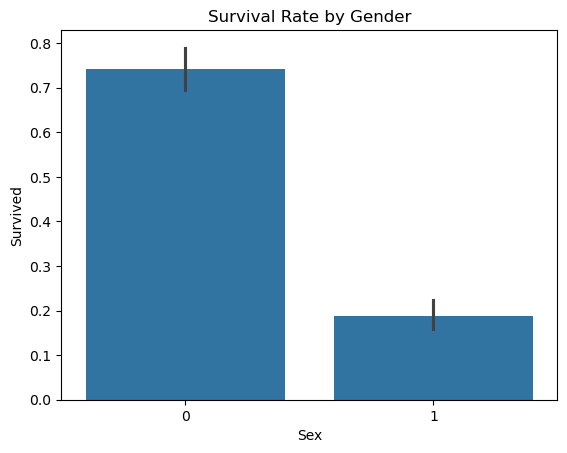

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


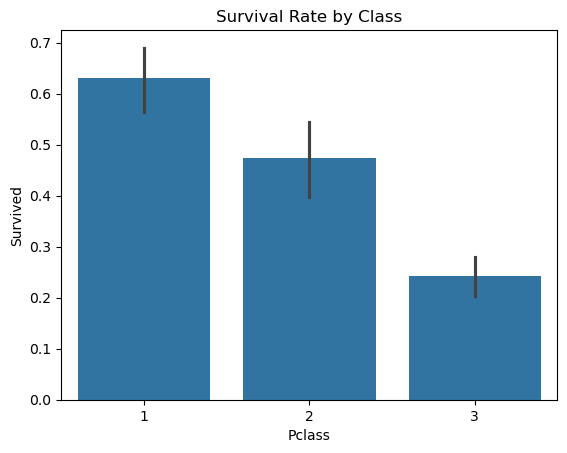

In [12]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()


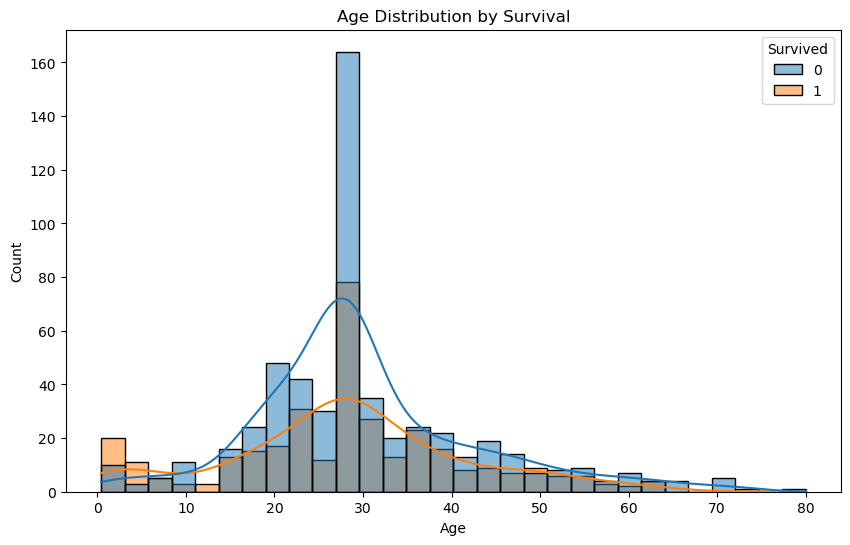

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()


In [14]:
X = df.drop(columns='Survived')
y = df['Survived']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.78


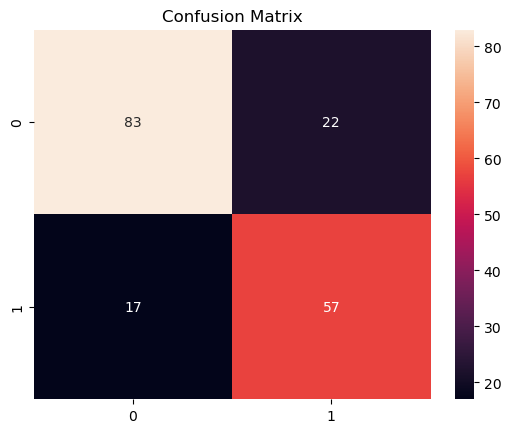

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



In [17]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.82


In [19]:
import joblib

joblib.dump(model, 'titanic_model.pkl')


['titanic_model.pkl']

In [20]:
import pandas as pd

# Use the correct path to your Airplane Crash dataset
file_path = r"C:\Users\lucir\Downloads\Airplane_Crashes_and_Fatalities_Since_1908.csv\Airplane_Crashes_and_Fatalities_Since_1908.csv"

# Load the dataset
airplane_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
airplane_df.head()


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [21]:
# Check the dataset structure and summary
airplane_df.info()

# Check for missing values
airplane_df.isnull().sum()

# Display basic statistics for numerical columns
airplane_df.describe()

# Look at the unique values in some key columns
print(airplane_df['Location'].value_counts().head())
print(airplane_df['Operator'].value_counts().head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB
Location
Sao Paulo, Brazil         15
Moscow, Russia            15
Rio de Janeiro, Brazil    14
Anchorage, Alaska         13
Manila, Philippines       13
Name: count, dtype: int64
Operator
Aero

In [22]:
# Example: Create a Safety Score (this is just a hypothetical example)
airplane_df['Safety_Score'] = airplane_df['Fatalities'] / (airplane_df['Aboard'] + 1)  # Adding 1 to avoid division by zero


In [23]:
selected_columns = ['Date', 'Operator', 'Location', 'Fatalities', 'Safety_Score']
filtered_airplane_df = airplane_df[selected_columns]


In [24]:
# Example: Concatenate the Safety_Score with the Titanic dataset
# (This is a simple example and might not be directly meaningful without proper alignment)
combined_df = pd.concat([df, filtered_airplane_df], axis=1)

# Display the combined dataframe
combined_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Date,Operator,Location,Fatalities,Safety_Score
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,09/17/1908,Military - U.S. Army,"Fort Myer, Virginia",1.0,0.333333
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,07/12/1912,Military - U.S. Navy,"AtlantiCity, New Jersey",5.0,0.833333
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,08/06/1913,Private,"Victoria, British Columbia, Canada",1.0,0.500000
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,09/09/1913,Military - German Navy,Over the North Sea,14.0,0.666667
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,10/17/1913,Military - German Navy,"Near Johannisthal, Germany",30.0,0.967742


In [25]:
import joblib

# Save the model
joblib.dump(model, 'titanic_airplane_model.pkl')

print("Model saved as 'titanic_airplane_model.pkl'")


Model saved as 'titanic_airplane_model.pkl'


In [26]:
import os
print(os.getcwd())


C:\Users\lucir
